In [2]:
import numpy as np
import pandas as pd
#import math
#import base64
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn
import plotly.express as px
import plotly.graph_objects as go
import csv
#import pandas_profiling
#import sweetviz
from matplotlib.ticker import StrMethodFormatter
import folium  #needed for interactive map
from folium.plugins import HeatMap
#%matplotlib inline
#sns.set()

# Geo Mobility Mapping

In [22]:
#Read geographic mobility dataset, drop columns and create total mobility column
with open('data/geo_mobility_with_lat_long_all.csv') as f:
    geo_mob_lat_long = pd.read_csv(f)#.drop(columns=['city_state', 'latitude', 'longitude', 'point_latitude', 'point_longitude']) #.sort_values(by='year', ascending=False)
    #geo_mob_lat_long['total_mobility_all'] = geo_mob_lat_long['same_county'] + geo_mob_lat_long['diff_county'] + geo_mob_lat_long['diff_state']+geo_mob_lat_long['from_abroad']
    #geo_mob_lat_long['total_mobility_outside'] = geo_mob_lat_long['diff_county'] + geo_mob_lat_long['diff_state']+geo_mob_lat_long['from_abroad']
    #geo_mob_lat_long['percent_change_all'] = geo_mob_lat_long['total_mobility_all'].pct_change()
    
geo_mob_lat_long


,city_state,city,year,total_year,same_county,diff_county,diff_state,from_abroad,latitude,longitude,point_latitude,point_longitude
0,"Albuquerque, New Mexico",Albuquerque,2010,540574,10.6,2.0,3.4,0.4,35.10°N,106.64°W,35.1,-106.64
1,"Albuquerque, New Mexico",Albuquerque,2011,544579,11.0,2.7,2.9,0.5,35.10°N,106.64°W,35.1,-106.64
2,"Albuquerque, New Mexico",Albuquerque,2012,548340,11.2,2.4,3.0,0.8,35.10°N,106.64°W,35.1,-106.64
3,"Albuquerque, New Mexico",Albuquerque,2013,549629,12.8,2.0,2.6,0.6,35.10°N,106.64°W,35.1,-106.64
4,"Albuquerque, New Mexico",Albuquerque,2014,550317,10.1,3.1,2.8,0.2,35.10°N,106.64°W,35.1,-106.64
...,...,...,...,...,...,...,...,...,...,...,...,...
265,"Washington, District of Columbia","Washington, DC",2015,663006,10.1,0.0,9.0,1.6,38.90°N,77.01°W,38.9,-77.01
266,"Washington, District of Columbia","Washington, DC",2016,672022,9.5,0.0,8.7,1.7,38.90°N,77.01°W,38.9,-77.01
267,"Washington, District of Columbia","Washington, DC",2017,684810,9.3,0.0,8.2,1.5,38.90°N,77.01°W,38.9,-77.01
268,"Washington, District of Columbia","Washington, DC",2018,693798,9.9,0.0,6.9,1.4,38.90°N,77.01°W,38.9,-77.01


In [23]:
geo_mob_lat_long.groupby(['city'])

In [ ]:
#geo_mob_lat_long[['year', 'total_year']].describe()

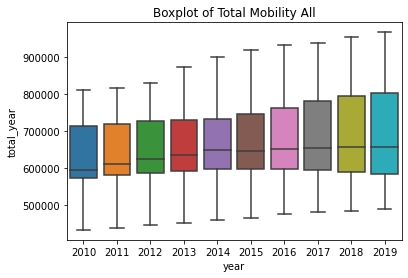

In [26]:
sns.boxplot(x = 'year', y='total_year', data = geo_mob_lat_long)
plt.title("Boxplot of Total Mobility All");

In [27]:
geo_mob_lat_long.dtypes

city_state          object
city                object
year                 int64
total_year           int64
same_county        float64
diff_county        float64
diff_state         float64
from_abroad        float64
latitude            object
longitude           object
point_latitude     float64
point_longitude    float64
dtype: object

Preparing data for folium.

In order to inspect the elements inside a zip object, we first need to convert it into a list.

In [15]:
my_zip = zip(geo_mob_lat_long['city'], geo_mob_lat_long['point_latitude'], geo_mob_lat_long['point_longitude'], geo_mob_lat_long['total_mobility_all'])
list(my_zip)

[('Albuquerque', 35.1, -106.64, 16.4),
 ('Albuquerque', 35.1, -106.64, 17.099999999999998),
 ('Albuquerque', 35.1, -106.64, 17.400000000000002),
 ('Albuquerque', 35.1, -106.64, 18.000000000000004),
 ('Albuquerque', 35.1, -106.64, 16.2),
 ('Albuquerque', 35.1, -106.64, 17.9),
 ('Albuquerque', 35.1, -106.64, 17.6),
 ('Albuquerque', 35.1, -106.64, 13.4),
 ('Albuquerque', 35.1, -106.64, 15.9),
 ('Albuquerque', 35.1, -106.64, 15.700000000000001),
 ('Austin', 30.3, -97.75, 28.299999999999997),
 ('Austin', 30.3, -97.75, 26.6),
 ('Austin', 30.3, -97.75, 27.5),
 ('Austin', 30.3, -97.75, 23.900000000000002),
 ('Austin', 30.3, -97.75, 23.0),
 ('Austin', 30.3, -97.75, 20.7),
 ('Austin', 30.3, -97.75, 19.700000000000003),
 ('Austin', 30.3, -97.75, 21.1),
 ('Austin', 30.3, -97.75, 21.7),
 ('Austin', 30.3, -97.75, 22.2),
 ('Baltimore', 39.3, -76.61, 16.6),
 ('Baltimore', 39.3, -76.61, 17.2),
 ('Baltimore', 39.3, -76.61, 17.0),
 ('Baltimore', 39.3, -76.61, 18.6),
 ('Baltimore', 39.3, -76.61, 17.1),
 (

In [16]:
my_zip = zip(geo_mob_lat_long['point_latitude'], geo_mob_lat_long['point_longitude'], geo_mob_lat_long['total_mobility_all'])
list_of_my_zip = list(my_zip)
list_of_my_zip[0:15]

[(35.1, -106.64, 16.4),
 (35.1, -106.64, 17.099999999999998),
 (35.1, -106.64, 17.400000000000002),
 (35.1, -106.64, 18.000000000000004),
 (35.1, -106.64, 16.2),
 (35.1, -106.64, 17.9),
 (35.1, -106.64, 17.6),
 (35.1, -106.64, 13.4),
 (35.1, -106.64, 15.9),
 (35.1, -106.64, 15.700000000000001),
 (30.3, -97.75, 28.299999999999997),
 (30.3, -97.75, 26.6),
 (30.3, -97.75, 27.5),
 (30.3, -97.75, 23.900000000000002),
 (30.3, -97.75, 23.0)]

Creating a HeatMap layer with the data:

In [17]:
city_coords = [38.90, -77.01]

In [18]:
folium_hmap = folium.Map(location=city_coords, zoom_start=13, tiles='CartoDB dark_matter')

#There are other styles available for the tiles argument:

#Stamen Toner
#Stamen Terrain
#Stamen Watercolor
#CartoDB positron
#CartoDB dark_matter
#OpenStreetMap


In [19]:
hm_layer = HeatMap(list_of_my_zip,
                   # These are parameters that we tweak manually to adjust color
                   # See folium docs for more information
                   min_opacity=0.5,
                   radius=12,
                   blur=6, 
                 )

In [36]:
folium_hmap.add_child(hm_layer)

In [ ]:
#Saving the map as HTML 
#folium_hmap.save("hmap.html")

In [34]:
folium_hmap = folium.Map(location=[39.76, -104.88],
                        zoom_start=3.75,
                        tiles='CartoDB dark_matter')

hm_wide = HeatMap( list(zip(geo_mob_lat_long['point_latitude'], geo_mob_lat_long['point_longitude'], geo_mob_lat_long['total_year'])),
                   min_opacity=0.3,
                   radius=14, blur=8, 
                   max_zoom=15, 
                 )

folium_hmap.add_child(hm_wide)